<a href="https://colab.research.google.com/github/sc22lg/COMP3611_Machine_Learning/blob/main/COMP3611_Estimating_mean_and_covariance_from_multivariate_normal_distributed_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Estimating mean and covariance from normal distributed data

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">COMP3611 Eigenvectors of the Covariance Matrix</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Marc de Kamps and University of Leeds</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

### Introduction

In a previous notebook we demonstrated that the eigenvalues and eigenvectors of the covariance matrix contain important information about the distribution. There, we used the covariance matrix that was used to generate the data. In general we don't know this matrix and we must estimate this from the data itself. Here, we show that these estimators work reasonably well if the data is from a Gaussain distribution. If the data is not from a Gaussian distribution, this process can still be used to decorrelate the data.

### Learning Objectives
In this notebook you will learn
- how to implement maximum likelihood estimation in Python
- how to compare the estimated eigenvectors to the theoretical ones


[[54 10]
 [10 33]]
[[79. 20.]
 [20. 37.]]


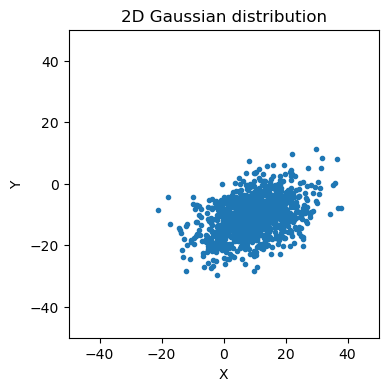

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 100

# define a random generator
rng = default_rng()

import numpy as np
# we pick an arbitary mean
mean = [10.,-10.]

# handpick the first direction of the data, this is an arbitrary choice
direction_1 = np.array([5,2])
# the second choice is not arbitrary: it must be orthogonal to the first one (why?)
direction_2 = np.array([-2,5])

# the following two lines use the outer product (aa^T) to create a covariance matrix that has
# the previous two directions as eigenvectors
tmp = 2*np.outer(direction_1,direction_1) + np.outer(direction_2,direction_2)
print(tmp)
cov = 3.*np.outer(direction_1,direction_1) + 1.*np.outer(direction_2,direction_2)
print(cov)

# Now, we're going to sample from a bivariate (=2D) Gaussian distribution. If al goes well:
# it centres around (10,1)
# The data extends maximally in direction (5,2)
# we're going to eyeball the dataset to see if this is correct.

sample=rng.multivariate_normal(mean, cov, size=1000)

plt.plot(sample.T[0],sample.T[1],'.')

plt.xlabel('X')
plt.ylabel('Y')
limit=50
plt.xlim([-limit,limit])
plt.ylim([-limit,limit])
plt.title('2D Gaussian distribution')
plt.savefig('gausssample.pdf')

The mean can be estimate using
$$
\bar{x} = \frac{1}{N} \sum^{N}_{i=1} \boldsymbol{x}_i,
$$
where $N$ is the number of data points and $\boldsymbol{x}_i$ is data point $i$, i.e. a two dimensional tuple $({x_1}_i, {x_2}_i)$.

In [ ]:
mean=(np.array([sample.T[0].sum(),sample.T[1].sum()])/sample.shape[0])
print('MLE for mu is: ',mean)

MLE for mu is:  [  9.66147224 -10.56441867]


(-50.0, 50.0)

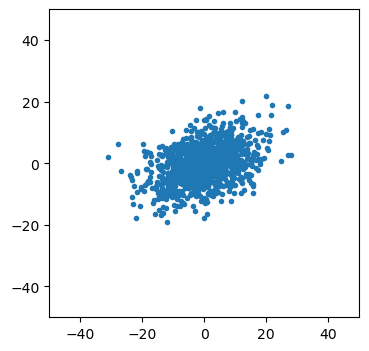

In [ ]:
diff=sample-mean
plt.plot(diff.T[0],diff.T[1],'.')
plt.xlim([-limit,limit])
plt.ylim([-limit,limit])

We have now centerded the data. We're now going to provide a literal implementation
of the maximum likelihood estimator of the covariance matrix and estimate it from the sample we've just generated.
$$
\Sigma = \frac{1}{N} \sum_i (\boldsymbol{x}_i - \bar{\boldsymbol{x}})(\boldsymbol{x}_i - \bar{\boldsymbol{x}})^T
$$
Here $\bar{\boldsymbol{x}}$ is the mean that we calculated in the previous cell. The quantity we just calculated is also called
the scattering matrix.


In [ ]:
# the following construction calculates a so-called generator of xx^T for each data point
# it is then summed over all data points
scat=sum(np.outer(x,x) for x in diff)/sample.shape[0]
print(scat)


[[82.20979626 22.12964611]
 [22.12964611 39.16172078]]


This is not a million miles from the original covariance matrix. We can calculate the eigen directions as in Example 1.6.1. We can also calculate the eigen directions of the original covariance matrix

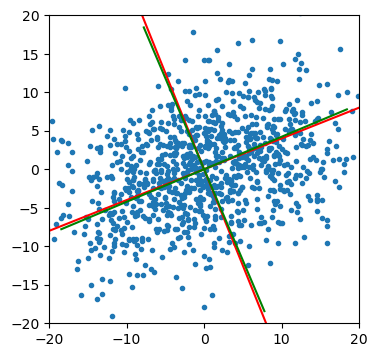

In [ ]:
# this is the eigenvector, eigenvalue set that we calculate from the original covarance matrix
eigvalues, eigvecs = np.linalg.eig(cov)

plt.plot(diff.T[0],diff.T[1],'.')

# this is a function that takes a set of eigenvectors, and a mean and plots them
# so that they acan appear on top of a dataset, for example.

def plotEigenDirections(eigvecs,c, limit = 20):
    n_points = 100
    dir1 = limit*np.linspace(-eigvecs[:,0][0], eigvecs[:,0][0],n_points)
    dir2 = limit*np.linspace(-eigvecs[:,0][1], eigvecs[:,0][1],n_points)
    plt.plot(dir1,dir2,c)

    dir3 = limit*np.linspace(-eigvecs[:,1][0], eigvecs[:,1][0],n_points)
    dir4 = limit*np.linspace(-eigvecs[:,1][1], eigvecs[:,1][1],n_points)
    plt.plot(dir3,dir4,c)
    plt.xlim([-limit,limit])
    plt.ylim([-limit,limit])

# plot the eigenvectors of the original covariance matrix
plotEigenDirections(eigvecs,'r-',limit=30)

eigvaluessc, eigvecssc = np.linalg.eig(scat)
plotEigenDirections(eigvecssc,'g-')

Even if there are some numerical differences in the entries of the estimated covariance matrix and the 'true' covariance matrix, the differences in eigen directions are barely visible relative to the data.

**Exercise 1**: Estimate the covariance matrix of the dataset in the cell below. Find eigenvectors and eigenvalues. Does the outlier on the left greatly influence the result? Would you leave it in or out? How would you motivate that?

**Exercise 2**: Relate the off-diagonal elements of the covariance matrix to the Pearson correlation coefficient. Does the result make sense, given the data?

**Exercise 3** Use the mean and covariance matrix to generate a synthetic dataset of $N = 1000$ events.

**Exercise 4** Use the following parameters to generate a sample of 200 points in the 2D plane:
$$
\vec{\mu} = \left( \begin{array}{r} 0 \\ 0 \end{array} \right)
$$
and
$$
\Sigma =
\begin{bmatrix}
1 & 2 \\
2 & 1
\end{bmatrix}
$$ as a covariance matrix.

You should receive an error message:
- Explain what goes wrong here. The matrix is symmetric after all.
- How do you ensure that the dataset you want to generate has the correct properties.


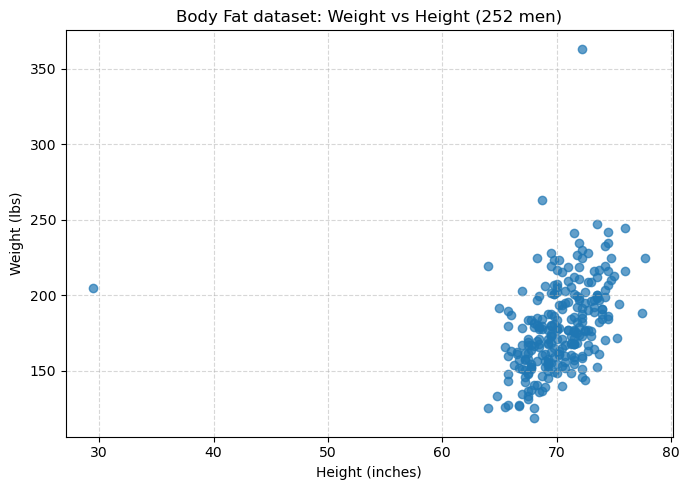

In [ ]:
# Adapted from GatGPT generated code
import pandas as pd
import matplotlib.pyplot as plt

# Robust public copy (CSV) of the Johnson body fat dataset
url = "https://hbiostat.org/data/repo/bodyfat.csv"

df = pd.read_csv(url)

# Basic sanity filter (drop impossible/zero entries if any)
df = df[(df["Height"] > 0) & (df["Weight"] > 0)]

plt.figure(figsize=(7, 5))
plt.scatter(df["Height"], df["Weight"], alpha=0.7)
plt.xlabel("Height (inches)")
plt.ylabel("Weight (lbs)")
plt.title("Body Fat dataset: Weight vs Height (252 men)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
